In [2]:
from __future__ import division
import numpy as np
import matplotlib
from scipy.signal import welch, periodogram

font = {'weight' : 'bold', 'size'   : 22}

import matplotlib
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (10, 8)
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from src.makeLISAdata import LISAdata

In [120]:
def make_Data(n_true, alpha_true, fmin=5e-5, fmax=0.1, dur=1e5, doplot=0, fs=1):
    
    params= []
    inj = []
    ld = LISAdata(params, inj)
    
    
    ## Theoretical
    frange = np.arange(1e-5, 1, 1e-5)
    Spos = n_true*(1 + 1.0/frange**alpha_true)

    ## Make gaussina data 
    Np = ld.gaussianData(Spos, frange, fs=fs, dur=dur)
    
    hwin = np.hanning(int(dur*fs))
    win_fact = np.mean(hwin**2)

    ## fft
    r1 =   np.sqrt(2.0/win_fact)*np.fft.rfft(hwin*Np)/np.sqrt(fs*dur)
    fftfreqs = np.fft.rfftfreq(int(dur*fs), 1.0/fs)

    if doplot:
        plt.loglog(fftfreqs, np.abs(r1)**2, label='PSD from ffts',alpha=0.75 )
        plt.plot(frange, Spos ,'--' ,label=' expected', alpha=0.9)
        plt.xlabel('frequency in Hz')
        plt.ylabel('PSD')
        plt.legend()
        plt.show()
    
    
    fidx = np.logical_and(fftfreqs>=fmin, fftfreqs<=fmax)
    return r1[fidx], fftfreqs[fidx]

In [147]:
def like(dur=1e5, fs=0.5):
    
    
    alpha_true = 0.0
    n_true = 1e-2
    r1, fftfreqs = make_Data(n_true, alpha_true, fmin=5e-3, fmax=0.1, dur=dur,  doplot=0, fs=fs)
    
    nlev = np.linspace(0.1*n_true,10*n_true, 2000)

    loglike = np.zeros(nlev.shape)

    for ii in range(nlev.size):
    
        psd_lev = nlev[ii]*(1 + 1/fftfreqs[1:200]**alpha_true)
        loglike[ii] = - np.sum((np.abs(r1[1:200])**2)/psd_lev + np.log(2*np.pi*psd_lev))
    
    like = np.exp(loglike - loglike.max())
    
    plt.semilogx(nlev, like, label='likelihood function')
    plt.axvline(n_true, color='r', label='true value')
    plt.legend()
    plt.xlabel('spectral parameter')
    plt.ylabel('likelihood (not normalized)')
    #plt.xlim(0.75*n_true, 1.25*n_true)

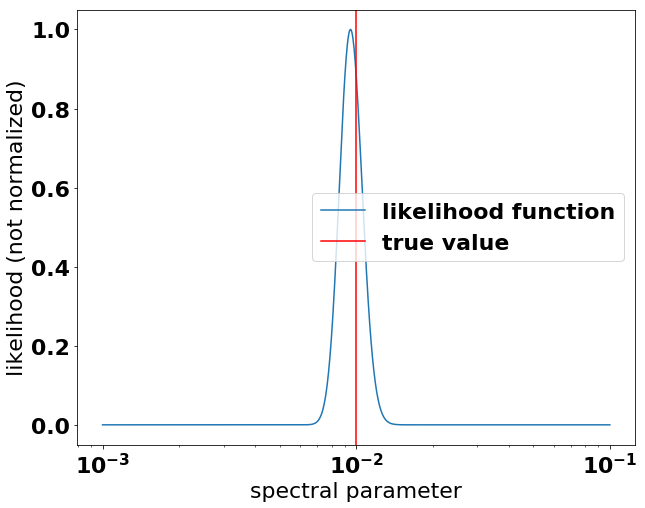

In [153]:
like(dur=1e3, fs=1)

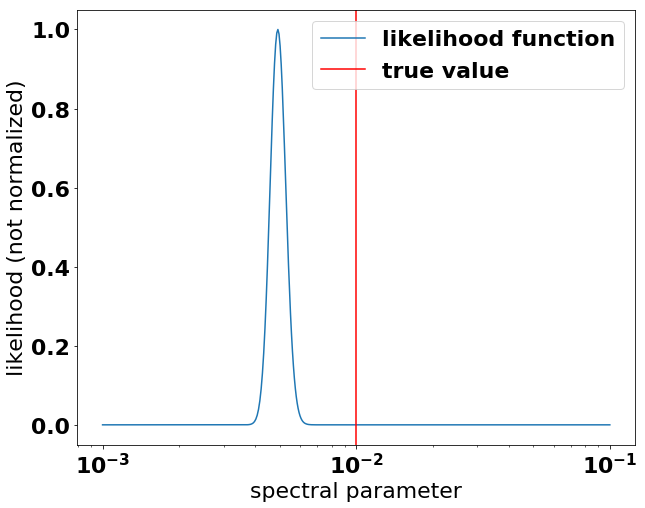

In [157]:
like(dur=1e4, fs=0.5)

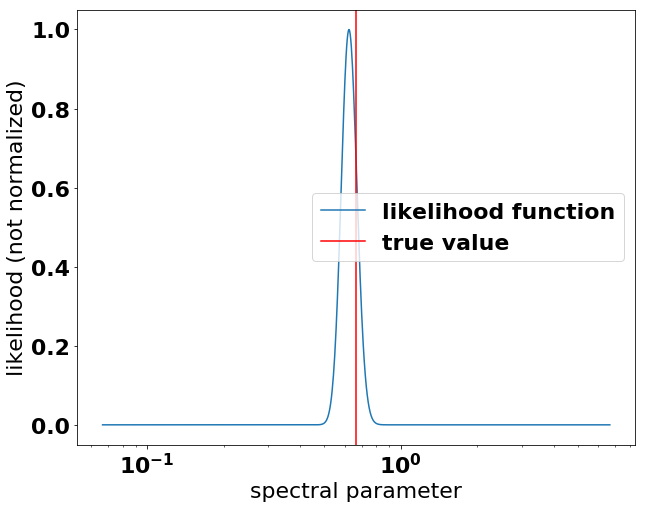

In [135]:
like(dur=5e5, fs=1)